<a href="https://colab.research.google.com/github/shaheerzubery/Deeplearning/blob/main/Deeplearning_using_Penguin_data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
path = "/content/penguins.csv"
DataSet = pd.read_csv(path).dropna()
DataSet.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0


In [2]:
DataSet.describe()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.757310
std,5.459584,1.974793,14.061714,801.954536,0.763648
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,1.000000
75%,48.500000,18.700000,213.000000,4750.000000,1.000000
max,59.600000,21.500000,231.000000,6300.000000,2.000000


In [3]:
DataSet['FlipperLength'] = DataSet['FlipperLength']/10
DataSet['BodyMass'] = DataSet['BodyMass']/100

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size

for i in range(1,3):
    DataSet = DataSet.append(DataSet)

DataSet.describe()


,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
count,1368.00000,1368.000000,1368.000000,1368.000000,1368.000000
mean,43.92193,17.151170,20.091520,42.017544,0.757310
std,5.45359,1.972625,1.404628,8.010741,0.762809
min,32.10000,13.100000,17.200000,27.000000,0.000000
25%,39.20000,15.600000,19.000000,35.500000,0.000000
50%,44.45000,17.300000,19.700000,40.500000,1.000000
75%,48.50000,18.700000,21.300000,47.500000,1.000000
max,59.60000,21.500000,23.100000,63.000000,2.000000


The Species column is the label our model will predict. Each label value represents a class of penguin species, encoded as 0, 1, or 2. The following code shows the actual species to which these class labels corrrespond.

In [4]:
sample = DataSet.sample(10)
sample
Penguin_class = ['Adelie', 'Gentoo', 'Chinstrap']
print(sample.columns[0:5].values, 'SpeciesName')

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName


In [5]:
for index, row in DataSet.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']', Penguin_class[int(row[-1])])

[ 55.9 17.0 22.8 56.0 1 ] Gentoo
[ 50.2 18.7 19.8 37.75 2 ] Chinstrap
[ 49.5 19.0 20.0 38.0 2 ] Chinstrap
[ 50.0 15.3 22.0 55.5 1 ] Gentoo
[ 39.7 17.9 19.3 42.5 0 ] Adelie
[ 50.2 18.7 19.8 37.75 2 ] Chinstrap
[ 38.6 17.2 19.9 37.5 0 ] Adelie
[ 48.2 14.3 21.0 46.0 1 ] Gentoo
[ 49.0 19.5 21.0 39.5 2 ] Chinstrap
[ 37.0 16.9 18.5 30.0 0 ] Adelie


Split the data

In [6]:
from sklearn.model_selection import train_test_split


feature = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
labels = 'Species'

x,y = DataSet[feature].values, DataSet[labels].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state= 0)
print('train size', x_train.shape[0],'Test size', x_test.shape[0])

train size 957 Test size 411


Training Part Using Tensorflow

In [7]:
pip install --upgrade tensorflow

In [8]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow.keras import optimizers

In [9]:
tensorflow.random.set_seed(0)

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.8.0
TensorFlow version: 2.8.0


Prepare Data for tensor flow

In [10]:
#Set data type for float features

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


#Set data type for categorical label
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print('ready ...')

ready ...


Construct neural newtwork

In [11]:
hidden_layer = 10

model = Sequential()
model.add(Dense(hidden_layer, input_dim = len(feature), activation='relu'))
model.add(Dense(hidden_layer, input_dim = hidden_layer, activation = 'relu'))
model.add(Dense(len(Penguin_class),input_dim = hidden_layer, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


Train the model

In [16]:
learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train the model over 50 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 50
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


96/96 [==============================] - 1s 7ms/step - loss: 0.9323 - accuracy: 0.6876 - val_loss: 0.8945 - val_accuracy: 0.6959
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 0.7659 - accuracy: 0.7179 - val_loss: 0.7344 - val_accuracy: 0.7032
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.6718 - accuracy: 0.7576 - val_loss: 0.6973 - val_accuracy: 0.8564
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 0.5954 - accuracy: 0.7879 - val_loss: 0.5959 - val_accuracy: 0.8613
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.5315 - accuracy: 0.8098 - val_loss: 0.5388 - val_accuracy: 0.7445
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.8537 - val_loss: 0.4851 - val_accuracy: 0.7543
Epoch 7/50
96/96 [==============================] - 0s 3ms/step - loss: 0.4416 - accuracy: 0.8527 - val_loss: 0.4338 - val_accuracy: 0.8394
Epoch 8/50
96/96 [=============

# **Review Trained model**

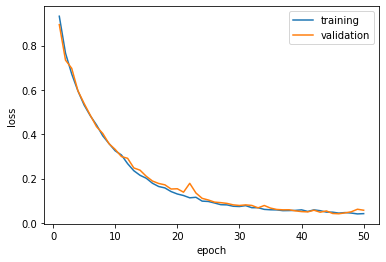

In [17]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

View the learned baises and weight

In [19]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('Weights', weights ,'/n' ,'biases', biases)

Weights [[-0.27236846 -0.3841947   0.03324002  0.08020484 -0.10909867  0.12366871
  -0.19756904  0.84458566  0.26858252 -0.4905011 ]
 [ 0.27471453  0.21265197  0.08151422 -0.17707926 -0.10406601  0.829508
   0.34363747 -0.20646174 -0.36604074 -0.5447268 ]
 [-0.28836262 -0.634329    0.2833845   0.34767175  0.23550075 -0.07004239
   0.14109215 -0.86872673 -0.45578727  0.3296095 ]
 [-0.42851955 -0.24623463 -0.28597653 -0.5230521  -0.43773973  0.2926158
  -0.08106264  0.19301431  0.78104573 -0.4691702 ]] /n biases [ 0.          0.         -0.01292539  0.          0.          0.16412234
 -0.19619295 -0.3949304  -0.14897065  0.        ]
Weights [[ 0.0607031  -0.30530828  0.39975524  0.3037489   0.15896738  0.03326017
  -0.53190327  0.40915883 -0.03316814 -0.1240823 ]
 [ 0.42301047  0.14984506 -0.54566675  0.3919103  -0.4295466   0.50397205
  -0.31616646  0.17803025 -0.41518384 -0.38429344]
 [ 0.5336163   0.37752342 -0.4694244   0.17206895 -0.04215616  0.5297911
   0.4356906   0.28243893  0.2

# **Evaluate Model Performance**

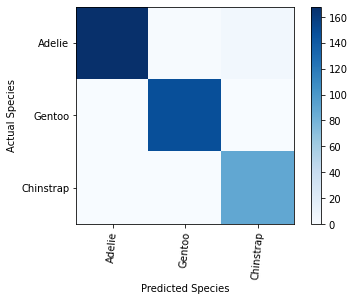

In [21]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(Penguin_class))
plt.xticks(tick_marks, Penguin_class, rotation=85)
plt.yticks(tick_marks, Penguin_class)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

**Save the Model**

In [22]:
ModelFilename = "models/penguin-classifier-dl.h5"
model.save(ModelFilename)

del model  # delete the existing model variable
print('model saved as', ModelFilename)

model saved as models/penguin-classifier-dl.h5


# **Use the model**

In [25]:
model = models.load_model(ModelFilename)

# CReate a new array of features
x_new = np.array([[50.4,15.3,20,50]])
print ('New sample: {}'.format(x_new))

# Use the model to predict the class
class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(Penguin_class[predictions[0]])

New sample: [[50.4 15.3 20.  50. ]]
Gentoo
